![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Model generation, and validation 

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Linear regression

- Select the columns which are correlated with `total_claim_amount` and don't suffer from multicollinearity (see the previous lab)
- Remove outliers
- X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
- Use the [Train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) to create the Train, and Test sets (make sure to set the `random_state` option to any integer number of your choice).
- Use the [pd.DataFrame()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the `columns=` option to set the columns names to `X.columns`).
- Split the `X_train` Pandas DataFrame into two: `numerical`, and `categorical` using `df.select_dtypes()`.
- If you need to transform any column, Train your transformers and/or scalers all the `numerical` columns using the `.fit()` **only in the Train** set (only one transformer/scaler for all the columns, check [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer), and [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) using the `.transform()` 
- Save all your transformers/scalers right after the `.fit()` using `pickle` using the code shown below:
  ```Python
  import os
  
  path = "transformers/"
  # Check whether the specified path exists or not
  isExist = os.path.exists(path)
  if not isExist:
      # Create a new directory because it does not exist
      os.makedirs(path)
     print("The new directory is created!")
 
  filename = "filename.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
  with open(path+filename, "wb") as file:
    pickle.dump(variable, file) # Replace "variable" with the name of the variable that contains your transformer
  ```
- If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the `.transform()` using the `pd.DataFrame()` function as you did earlier with the Numpy arrays generated by the `train_test_split()` function.
- Transform the `categorical` columns into numbers using a:
  - [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) for categorical **nominal** columns. (again **only use the `.fit()` in the Train set**, but the .`transform()` in the Train and the Test sets)
  - Remember to save all your transformers/scalers right after the `.fit()` using `pickle` using the code shown below:
    ```Python
    path = "encoders/"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
      # Create a new directory because it does not exist
      os.makedirs(path)
      print("The new directory is created!")
 
    filename = "filename.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
    with open(path+filename, "wb") as file:
       pickle.dump(variable, file) # Replace "variable" with the name of the variable that contains your transformer
    ```
  - Use `.replace()` to cast into numbers any categorical **ordinal** column replacing each label with a number that: respects the order of the labels and the relative "distance"
- Concat `numerical_transformer` and `categorical_transfomed` DataFrames using `pd.concat()`.
- Apply another MinMaxScaler to the concatenated DataFrame.
- Remember to save all your MinMaxScaler right after the `.fit()` using `pickle` using the code shown below:
    ```Python
    path = "scalers/"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
      # Create a new directory because it does not exist
      os.makedirs(path)
      print("The new directory is created!")
 
    filename = "filename.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
    with open(path+filename, "wb") as file:
       pickle.dump(variable, file) # Replace "variable" with the name of the variable that contains your transformer
    ```
- Apply linear regression to the Pandas DataFrame obtained in the previous step using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Remember to save your linear model right after the `.fit()` using `pickle` using the code shown below:
  ```Python
      path = "models/"
      # Check whether the specified path exists or not
      isExist = os.path.exists(path)
      if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        print("The new directory is created!")
 
       filename = "filename.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
       with open(path+filename, "wb") as file:
          pickle.dump(variable, file) # Replace "variable" with the name of the variable that contains your transformer
    ```

### Model Validation

- Compute the following metrics for your Train and Test sets:
  - [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).
  - [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error).
  - [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error)
  - [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn-metrics-mean-absolute-error).

- Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.

In [286]:
import os
import numpy as np
import pandas as pd
import pickle
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import my_functions

# Load csv data
df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

# Format column names
df = my_functions.format_column_names(df)

# Preview data
display(df.head())

# Describe data
display(df.describe())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# 2. Select Features

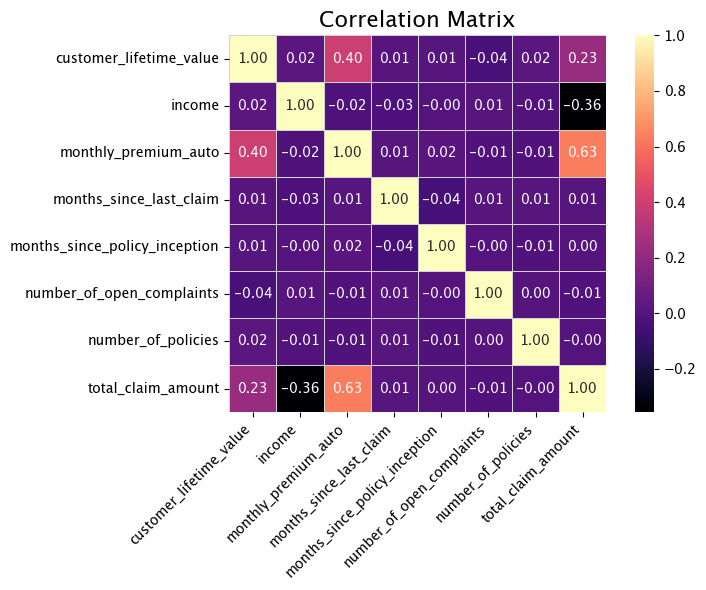

In [287]:
# Plot correlation matrix
my_functions.plot_corr_matrix(df)

In [288]:
# Select features with a correlation index > 0.9 with the target column: total_claim_amount
correlated_columns = df[
    my_functions.select_features_for_linear_models_based_on_correlation(df, 
                                                                        y='total_claim_amount', 
                                                                        threshold=0.9)].columns
print(correlated_columns)

Index(['total_claim_amount'], dtype='object')


+ Column to be used as target -> **total_claim_amount**
+ Feature selection -> although there are no columns with high correlation, as practice, all numerical columns will be used in this excercise

# 3. Remove Outliers

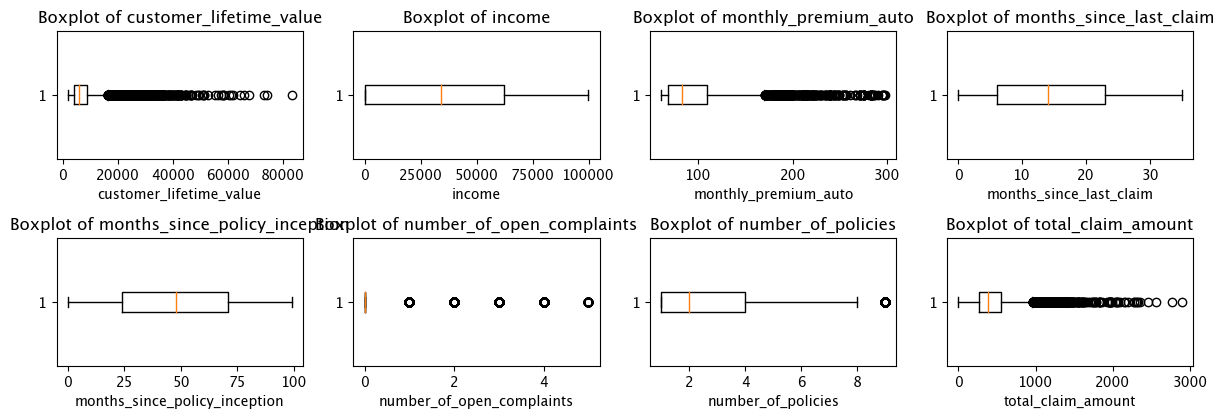

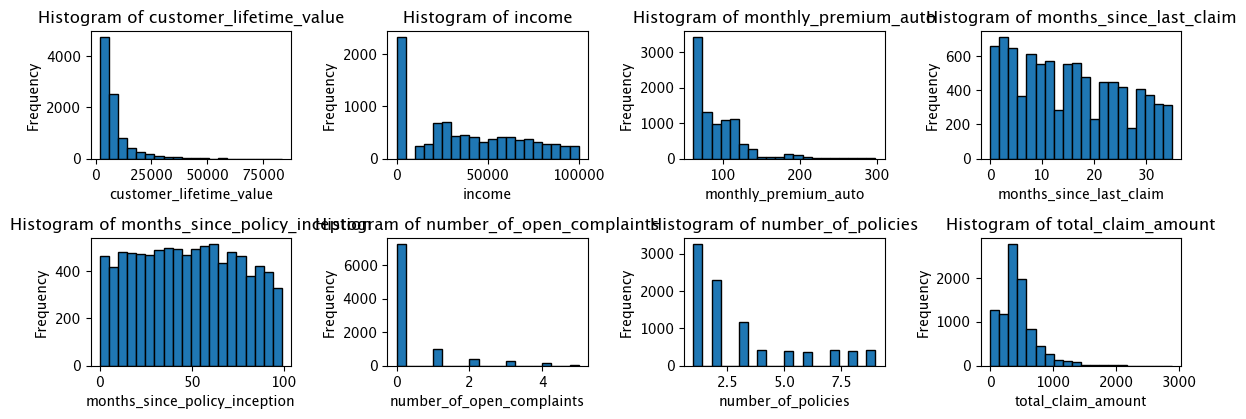

In [289]:
# Draw plots to analize which columns need outliers removed

my_functions.plot_numeric_columns(df, 'boxplot')
my_functions.plot_numeric_columns(df, 'histogram')

**Columns to remove outliers:**

+ monthly_premium_auto
+ total_claim_amount
+ customer_lifetime_value

*All three columns present long tails on the right with spread outliers.*

In [290]:

def remove_outliers(df: pd.DataFrame, columns: list, lower_percentile: float=25, upper_percentile: float =75):
    '''
    This function removes the outliers of specified columns of a 
    dataset that lie out of the limits provided as inputs.
    
    Input:
    df: input DataFrame
    columns: list of columns to remove outliers
    lower_percentile: lower limit percentile to remove outliers
    upper_percentile: upper limit percentile to remove outliers
    
    Output:
    DataFrame with removed outliers
    
    '''
    
    filtered_data = df.copy()
    interval = (upper_percentile - lower_percentile) / 100
    
    for column in columns:
        lower_limit = np.percentile(filtered_data[column], lower_percentile)
        upper_limit = np.percentile(filtered_data[column], upper_percentile)
        iqr = upper_limit - lower_limit
        lower_whisker = lower_limit - (1 + interval) * iqr
        upper_whisker = upper_limit + (1 + interval) * iqr

        filtered_data = filtered_data[(filtered_data[column] > lower_whisker) & (filtered_data[column] < upper_whisker)]

    return filtered_data


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000
mean,6028.786093,38615.628804,85.873130,15.003352,47.985302,0.391568,3.050284,379.387290
std,3031.037543,30329.936594,21.809305,10.031838,27.869902,0.924891,2.472241,200.502193
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3600.934326,12199.500000,68.000000,6.000000,24.000000,0.000000,1.000000,253.321662
50%,5326.113261,35109.000000,77.000000,14.000000,48.000000,0.000000,2.000000,355.200000
75%,7956.522096,62917.750000,103.000000,23.000000,71.000000,0.000000,4.000000,513.600000
max,15769.107760,99981.000000,170.000000,35.000000,99.000000,5.000000,9.000000,925.137143


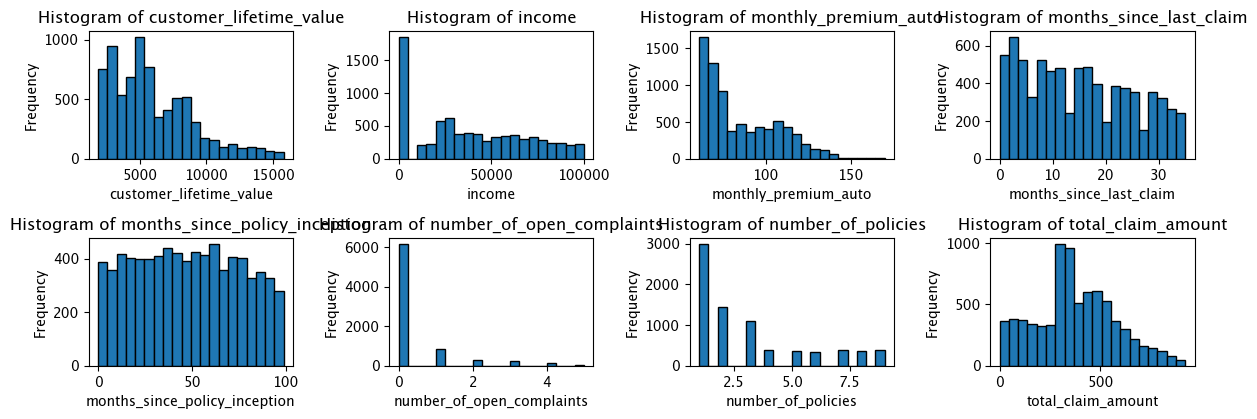

None

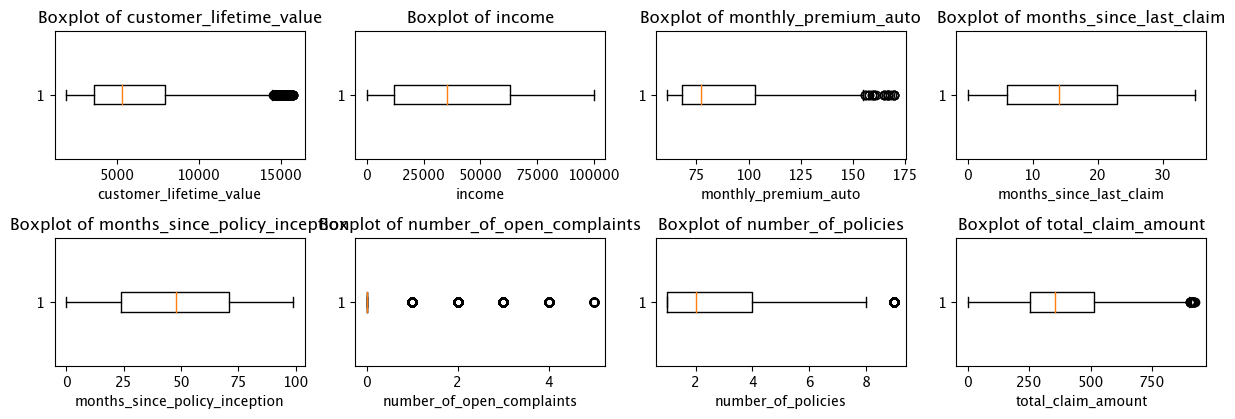

None

In [291]:
# Remove outliers of columns: 'customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount'
df = remove_outliers(df, ['monthly_premium_auto', 'total_claim_amount','customer_lifetime_value'])

# Check transformed data:
display(df.describe())
display(my_functions.plot_numeric_columns(df, 'histogram'))
display(my_functions.plot_numeric_columns(df, 'boxplot'))

+ Outliers for the 3 transformed columns *monthly_premium_auto*, *total_claim_amount*, *customer_lifetime_value* are now in the whisker's interval
+ **Long tails on the right have been reduced**

In [292]:
# Check if we need to apply a PowerTranformer to target column 'total_claim_amount
my_functions.calculate_skew(df[['total_claim_amount']])

,Column,Skew,Outside Interval
0,total_claim_amount,0.218136,False


# X/y split

In [293]:
# Separate the features from the target
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

In [294]:
# Generate the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [295]:
# Add columns to X_train and X_test and transform into DataFrame
X_train = pd.DataFrame(X_train, columns = X.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test,  columns = X.columns, index=X_test.index)

In [296]:
# Split X_train into numerical and categorical columns
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')

# Split X_test into numerical and categorical columns
X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

# 6. Apply Transformations to Numerical Columns

+ Numerical columns are:
1. Normalized -> to be Gaussian like (normal bell shape histogram)
2. Scaled -> so all columns are in the range [0,1]

In [297]:
# Calculate skewness of numerical columns
my_functions.calculate_skew(X_train_num, interval = (-2,2))

,Column,Skew,Outside Interval
0,customer_lifetime_value,0.971637,False
1,income,0.258536,False
2,monthly_premium_auto,0.819575,False
3,months_since_last_claim,0.276051,False
4,months_since_policy_inception,0.042373,False
5,number_of_open_complaints,2.741665,True
6,number_of_policies,1.152342,False


+ 1 out of 7 columns present a high skewness, out of interval [-2, 2]

-> **We will apply transformations to reduce skewness**

### 6.1.2 Apply PowerTransformer to Numerical Columns

We select the PowerTransformer to make features more Gaussian like -> normalize data & reduce skewness
+ Method selection:
    + yeo-johnson -> works with positive and negative values
    + box-cox -> only works with strictly positive values
    
**Since our data contains 0's we must apply yeo-johnson method**

In [298]:
# Select PowerTransformer with yeo-johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit transformer with TRAIN data
transformer.fit(X_train_num)

# Save transformer to use later
path = "transformers/"
transformer_file_name = "power_transformer.pkl"

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

with open(path + transformer_file_name, "wb") as file:
    pickle.dump(transformer, file)

# Transform X_train_num & X_test_num with fitted transformer -> output is a np.array
X_train_num_transformed = transformer.transform(X_train_num)
X_test_num_transformed = transformer.transform(X_test_num)
#y_train_transformed = transformer.transform(y_train)

# Add columns to np.array to create a DataFrame
# IMPORTANT -> index = X_train/test_nom.index -> ensures we maintain index order & match when we concatenate
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

### 6.1.3 Check Transformation

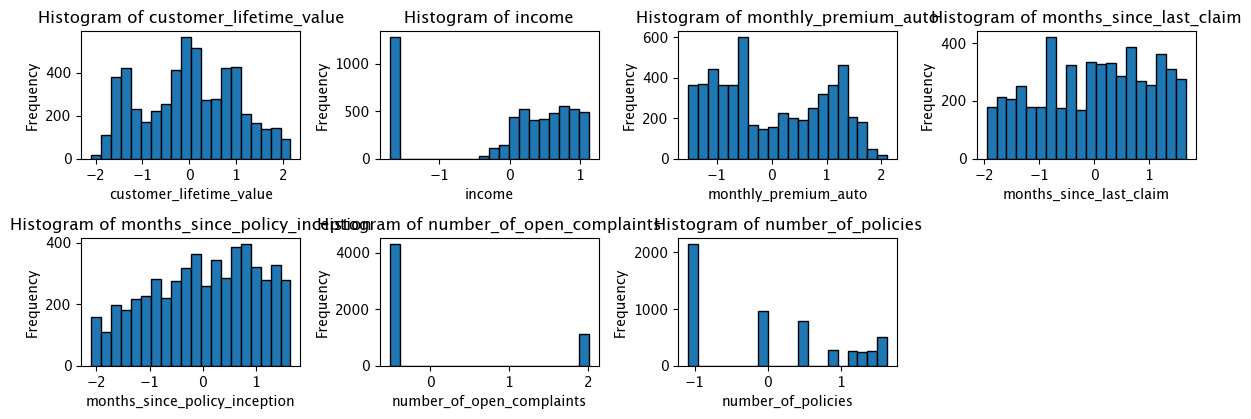

None

,Column,Skew,Outside Interval
0,customer_lifetime_value,0.006720,False
1,income,-0.903054,False
2,monthly_premium_auto,0.167480,False
3,months_since_last_claim,-0.182320,False
4,months_since_policy_inception,-0.250301,False
5,number_of_open_complaints,1.436387,False
6,number_of_policies,0.208698,False


In [299]:
# Check transformation on histogram
display(my_functions.plot_numeric_columns(X_train_num_transformed_df, 'histogram'))

# Check skewness transformed data
my_functions.calculate_skew(X_train_num_transformed_df, interval = (-2,2))

+ **Numerical columns' skewness is now in the range [-2,2]**
+ Histograms show a centered normalized curve

## 6.2 Scale Numerical Columns


### 6.2.1 Check Range

In [300]:
# Check min-max interval for numerical columns using .describe()
X_train_num_transformed_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,5.429000e+03,5.429000e+03,5.429000e+03,5.429000e+03,5.429000e+03,5.429000e+03,5.429000e+03
mean,-9.809390e-16,6.805714e-17,-1.130743e-13,1.622901e-16,1.439670e-16,-5.693242e-17,-7.525549e-17
std,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00,1.000092e+00
min,-2.091725e+00,-1.705646e+00,-1.522325e+00,-1.951315e+00,-2.098238e+00,-5.133897e-01,-1.087472e+00
25%,-7.853454e-01,-2.205512e-01,-9.217731e-01,-8.248203e-01,-7.933358e-01,-5.133897e-01,-1.087472e+00
50%,1.890861e-02,3.393920e-01,-2.342960e-01,6.317029e-02,9.777080e-02,-5.133897e-01,-6.318047e-02
75%,7.962906e-01,7.545741e-01,9.834914e-01,8.261718e-01,8.353065e-01,-5.133897e-01,8.465240e-01
max,2.165430e+00,1.126987e+00,2.108003e+00,1.661390e+00,1.645920e+00,2.014236e+00,1.628011e+00


### 6.2.2 Apply MinMaxScaler to Numerical Columns

+ MinMax Scaler will be applied to *X_train_num_transformed* to force them in the [0,1] range

In [301]:
# Select MinMaxScaler to turn the numerical columns' minimum = 0 and the maximum = 1
scaler = MinMaxScaler()

# Fit scaler with TRAIN data
scaler.fit(X_train_num_transformed_df)

# Save scaler to use later
path = "scalers/"
scaler_file_name = "num_min_max_scaler.pkl"

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

# Scale X_train_num_transformed with fitted scaler. Output is a np.array.
X_train_num_transformed_scaled = scaler.transform(X_train_num_transformed_df)
X_test_num_transformed_scaled = scaler.transform(X_test_num_transformed_df)

# Add columns to np.array to create a DataFrame
X_train_num_transformed_scaled_df = pd.DataFrame(X_train_num_transformed_scaled, 
                                                 columns=X_train_num_transformed_df.columns, 
                                                 index=X_train_num_transformed_df.index) # <-IMPORTANT- keeps index order for concat

X_test_num_transformed_scaled_df = pd.DataFrame(X_test_num_transformed_scaled, 
                                                columns=X_test_num_transformed_df.columns,
                                                index=X_test_num_transformed_df.index) # <-IMPORTANT- keeps index order for concat

### 6.2.3 Check Scale Transformation

In [302]:
# Check min-max interval for numerical coluns using .describe()
X_train_num_transformed_scaled_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,0.491343,0.602142,0.419335,0.540126,0.560403,0.203111,0.400471
std,0.234920,0.353061,0.275483,0.276826,0.267107,0.395665,0.368293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306867,0.524281,0.165426,0.311815,0.348517,0.000000,0.000000
50%,0.495785,0.721957,0.354797,0.557611,0.586516,0.000000,0.377204
75%,0.678391,0.868528,0.690245,0.768811,0.783499,0.000000,0.712211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


+ **All columns have been scaled correctly -> mins = 0, maxs = 1**

# 7. Apply Transformations to Categorical Columns

+ 7.1 Split categorical columns into **nominal** and **ordinal**
+ 7.2 Transform **nominal** columns with **OneHotEncoder**
+ 7.3 Transform **ordinal** columns with **.replace()**

## 7.1 Nominal - Ordinal Column Split

In [303]:
# Analyze values for all categorical columns to split them in Nominal - Ordinal
for i in X_train_cat.columns:
    display(X_train_cat[i].value_counts())

TN51356    1
QZ17137    1
YD53564    1
YV97407    1
JC96695    1
          ..
QD28391    1
SS95187    1
ZP47993    1
NF82527    1
ZS94723    1
Name: customer, Length: 5429, dtype: int64

California    1905
Oregon        1554
Arizona       1002
Nevada         505
Washington     463
Name: state, dtype: int64

No     4624
Yes     805
Name: response, dtype: int64

Basic       3440
Extended    1584
Premium      405
Name: coverage, dtype: int64

Bachelor                1630
College                 1577
High School or Below    1550
Master                   456
Doctor                   216
Name: education, dtype: int64

1/10/11    121
1/3/11     119
1/27/11    119
2/14/11    119
1/19/11    113
1/17/11    110
1/20/11    109
1/31/11    109
2/27/11    108
2/26/11    107
1/26/11    103
2/3/11     102
1/29/11    102
1/23/11    101
1/28/11    100
2/2/11     100
1/2/11      96
2/19/11     96
2/7/11      95
1/7/11      95
2/5/11      95
1/30/11     93
1/18/11     93
2/4/11      93
1/25/11     93
2/18/11     92
2/28/11     92
2/22/11     92
2/16/11     91
1/13/11     91
2/11/11     91
1/21/11     90
1/11/11     90
2/10/11     89
2/23/11     89
2/21/11     89
1/6/11      89
1/9/11      88
2/12/11     88
1/5/11      85
1/16/11     84
1/14/11     84
2/6/11      84
2/25/11     83
2/24/11     82
2/9/11      82
1/1/11      81
1/15/11     81
1/24/11     81
2/1/11      80
2/13/11     79
1/8/11      79
2/17/11     78
2/20/11     77
2/8/11      76
2/15/11     75
1/12/11     72
1/22/11     70
1/4/11      64
Name: effective_to_date, dtype: int64

Employed         3464
Unemployed       1279
Medical Leave     258
Disabled          249
Retired           179
Name: employmentstatus, dtype: int64

F    2780
M    2649
Name: gender, dtype: int64

Suburban    3358
Rural       1079
Urban        992
Name: location_code, dtype: int64

Married     3227
Single      1398
Divorced     804
Name: marital_status, dtype: int64

Personal Auto     4043
Corporate Auto    1167
Special Auto       219
Name: policy_type, dtype: int64

Personal L3     2018
Personal L2     1277
Personal L1      748
Corporate L3     601
Corporate L2     360
Corporate L1     206
Special L2       102
Special L3        80
Special L1        37
Name: policy, dtype: int64

Offer1    2158
Offer2    1789
Offer3     843
Offer4     639
Name: renew_offer_type, dtype: int64

Agent          2090
Branch         1495
Call Center    1038
Web             806
Name: sales_channel, dtype: int64

Four-Door Car    3015
Two-Door Car     1246
SUV               931
Sports Car        237
Name: vehicle_class, dtype: int64

Medsize    3803
Small      1048
Large       578
Name: vehicle_size, dtype: int64

+ **Nominal columns:**
    + state
    + response
    + employmentstatus
    + gender
    + location_code
    + marital_status
    + policy_type
    + policy
    + renew_offer_type
    + sales_channel
    + vehicle_class
+ **Ordinal columns:**
    + coverage
    + education
    + vehicle_size
+ **effective_to_date** -> should be transformed into difference in number of days to a relative to a date and classified as a numerical column. Since it is out of the scope of this lab, it will be removed from categorical columns
+ **customer** -> will be dropped since it has no correlation value

In [304]:
# Remove 'customer' and 'effective_to_date' columns
X_train_cat = X_train_cat.drop(['customer', 'effective_to_date'], axis=1)
X_test_cat = X_test_cat.drop(['customer', 'effective_to_date'], axis=1)

In [305]:
# Create lists with nominal and ordinal columns
nominal_cols = ['state','response','employmentstatus','gender','location_code','marital_status',
                'policy_type','policy','renew_offer_type','sales_channel','vehicle_class']
ordinal_cols = ['coverage','education','vehicle_size']

# Split categorical data into nominal-ordinal
X_train_cat_nom = X_train_cat[nominal_cols].copy()
X_train_cat_ord = X_train_cat[ordinal_cols].copy()
X_test_cat_nom = X_test_cat[nominal_cols].copy()
X_test_cat_ord = X_test_cat[ordinal_cols].copy()

## 7.2 Transform Nominal Columns with OneHotEncoder

In [306]:
# Select OneHotEnconder to add as many binary columns as values per column to the DataFrame
encoder = OneHotEncoder() # categories = [[valores_state] ,[valores_response] , , ] ,drop="first"

# Fit encoder
encoder.fit(X_train_cat_nom)

# Save encoder to use later
path = "encoders/"
encoder_file_name = "one_hot_encoder.pkl"

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

with open(path + encoder_file_name, "wb") as file:
    pickle.dump(encoder, file)

# Encode X_train_cat_nom and X_test_cat_nom with fitted encoder. 
# Output is a np.SparseMatrix -> to_array() to transform to np.array
X_train_cat_nom_encoded = encoder.transform(X_train_cat_nom).toarray()
X_test_cat_nom_encoded = encoder.transform(X_test_cat_nom).toarray()

# Get feature names from encoder
column_names = encoder.get_feature_names_out()

# Convert np.array to DataFrame by adding columns
X_train_cat_nom_encoded_df = pd.DataFrame(X_train_cat_nom_encoded, 
                                          columns=column_names, 
                                          index=X_train_cat_nom.index) # <-IMPORTANT- keeps index order for concat

X_test_cat_nom_encoded_df = pd.DataFrame(X_test_cat_nom_encoded, 
                                         columns=column_names, 
                                         index=X_test_cat_nom.index) # <-IMPORTANT- keeps index order for concat

## 7.3 Transform Ordinal Columns with .replace()

In [307]:
# Ordinal columns to replace:
ordinal_cols

['coverage', 'education', 'vehicle_size']

### 7.3.1 Replace 'coverage' column values

In [308]:
# Check column values
display(X_train_cat_ord['coverage'].value_counts())

Basic       3440
Extended    1584
Premium      405
Name: coverage, dtype: int64

Assign replacement values **respecting order** and keeping **same interval** between values:

Column value|Replacement value
---------------|--------------
Basic|1
Extended|2
Premium|3

In [309]:
# Assign replacement values
replacements = { 'Basic':1, 'Extended':2, 'Premium':3 }

# Replace values
indice = X_train_cat_ord.columns.tolist().index('coverage')
X_train_cat_ord[X_train_cat_ord.columns[indice]] = X_train_cat_ord[X_train_cat_ord
                                                                   .columns[indice]].replace(replacements)
X_test_cat_ord[X_test_cat_ord.columns[indice]]  = X_test_cat_ord[X_test_cat_ord
                                                                 .columns[indice]].replace(replacements)

In [310]:
# Check replacements
X_train_cat_ord['coverage'].value_counts()

1    3440
2    1584
3     405
Name: coverage, dtype: int64

### 7.3.2 Replace 'education' column values

In [311]:
# Check column values
display(X_train_cat_ord['education'].value_counts())

Bachelor                1630
College                 1577
High School or Below    1550
Master                   456
Doctor                   216
Name: education, dtype: int64

Assign replacement values **respecting order** and keeping **same interval** between values:

Column value|Replacement value
---------------|--------------
High School or Below|1
Bachelor|2
College|3
Master|4
Doctor|5

In [312]:
# Assign replacement values
replacements = {'High School or Below':1,
                'Bachelor':2,
                'College':3,
                'Master':4,
                'Doctor':5,
               }

# Replace values
X_train_cat_ord['education'] = X_train_cat_ord['education'].replace(replacements)
X_test_cat_ord['education'] = X_test_cat_ord['education'].replace(replacements)

# Check replacements
X_train_cat_ord['education'].value_counts()

2    1630
3    1577
1    1550
4     456
5     216
Name: education, dtype: int64

### 7.3.3 Replace 'vehicle_size' column values

In [313]:
# Check column values
display(X_train_cat_ord['vehicle_size'].value_counts())

Medsize    3803
Small      1048
Large       578
Name: vehicle_size, dtype: int64

Assign replacement values **respecting order** and keeping **same interval** between values:

Column value|Replacement value
---------------|--------------
Small|1
Medsize|2
Large|3

In [314]:
# Assign replacement values
replacements = {'Small':1,
                'Medsize':2,
                'Large':3,
               }

# Replace values
X_train_cat_ord['vehicle_size'] = X_train_cat_ord['vehicle_size'].replace(replacements)
X_test_cat_ord['vehicle_size'] = X_test_cat_ord['vehicle_size'].replace(replacements)

# Check replacements
X_train_cat_ord['vehicle_size'].value_counts()

2    3803
1    1048
3     578
Name: vehicle_size, dtype: int64

# 8. Concat Numerical & Categorical DataFrames

In [315]:
# Concatenate horizontally numerical, categorical nominal and categorical ordinal data frames

# X_train
X_train_transformed = pd.concat(
    [X_train_num_transformed_scaled_df,
     X_train_cat_nom_encoded_df,
    X_train_cat_ord],
    axis=1)

# X_test
X_test_transformed = pd.concat(
    [X_test_num_transformed_scaled_df,
     X_test_cat_nom_encoded_df,
    X_test_cat_ord],
    axis=1)

# Display X_train_transformed
display(X_train_transformed) 

# Display X_test_transformed
display(X_test_transformed)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,education,vehicle_size
3253,0.126083,0.943035,0.030318,0.445134,0.502420,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,2,2
2204,0.797525,0.512855,0.559642,0.657072,0.886576,0.000000,0.377204,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,3
1019,0.347082,0.643098,0.654556,0.810491,0.521544,0.952988,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,2
1989,0.481553,0.627081,0.165426,0.414223,0.483017,0.952988,1.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2
1996,0.087410,0.000000,0.000000,0.273362,0.314818,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,0.505031,0.965011,0.189539,0.927494,0.412617,0.992417,0.581859,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2
5491,0.716348,0.000000,0.559642,0.557611,0.255497,0.998132,0.377204,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,2
5269,0.618045,0.000000,0.615113,0.530920,0.303296,0.000000,0.803317,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,2,3
6120,0.382618,0.000000,0.165426,0.830784,0.917351,0.998132,0.581859,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,2


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,education,vehicle_size
7539,0.493312,0.764098,0.165426,0.557611,0.815748,0.000000,0.581859,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,4,3
5677,0.570817,0.851696,0.389665,0.000000,0.708968,0.952988,0.965497,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,3
3115,0.632434,0.952510,0.535256,0.964232,0.947729,0.000000,0.581859,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,1,2
4521,0.485513,0.936286,0.087480,0.725520,0.577407,0.000000,1.000000,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,3,1
4827,0.522036,0.651132,0.235233,0.725520,0.549745,0.000000,1.000000,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.555356,0.882880,0.955610,0.964232,0.348517,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,3,2
5571,0.574409,0.000000,0.559642,0.135363,0.568244,0.952988,0.581859,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,2
1034,0.422565,0.707389,0.772706,0.927494,0.148245,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,2,2
7910,0.689482,0.560269,0.779244,0.381872,0.691998,0.952988,0.581859,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,3,2


# 9. Apply MinMaxScaler to X DataFrames

+ We will apply once again MinMaxScaler to the complete, concatenated DataFrame. Although we have previously scaled the numerical columns, the categorical ordinal columns are out of the [0,1] range since we applied the .replace() transformation. Therefore they need to be scaled (see below).

In [316]:
# Check range of ordinal columns
X_train_transformed[ordinal_cols].describe()

,coverage,education,vehicle_size
count,5429.000000,5429.000000,5429.000000
mean,1.440965,2.292319,1.913428
std,0.629116,1.088485,0.540427
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000
max,3.000000,5.000000,3.000000


+ Ordinal columns are in the [1,5] range -> **MinMaxScaler needed**

In [317]:
# Select MinMaxScaler to turn X_train_transformed & X_test_transformed to minimum = 0 and the maximum = 1
scaler = MinMaxScaler()

# Fit scaler with TRAIN data
scaler.fit(X_train_transformed)

# Save scaler to use later
path = "scalers/"
scaler_file_name = "X_min_max_scaler.pkl" # 'X_' prefix to differentiate from numerical scaler

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

# Scale X_train_transformed and X_test_transformed with fitted scaler. Output is a np.array.
X_train_transformed_scaled = scaler.transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

# Add columns to np.array to create a DataFrame
X_train_transformed_scaled_df = pd.DataFrame(X_train_transformed_scaled, 
                                                 columns=X_train_transformed.columns, 
                                                 index=X_train_transformed.index)

X_test_transformed_scaled_df = pd.DataFrame(X_test_transformed_scaled, 
                                              columns=X_test_transformed.columns,
                                               index=X_test_transformed.index)


In [318]:
# Check scale output
X_train_transformed_scaled_df[ordinal_cols].describe()

,coverage,education,vehicle_size
count,5429.000000,5429.000000,5429.000000
mean,0.220483,0.323080,0.456714
std,0.314558,0.272121,0.270214
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000
50%,0.000000,0.250000,0.500000
75%,0.500000,0.500000,0.500000
max,1.000000,1.000000,1.000000


+ Categorical ordinal column values are now in the [0,1] range -> **Scaled OK**

# 10. Apply Linear Regression & Generate Model
## 10.1 Train & Save Model

In [319]:
# Select Linear Regression model
linear_model = LinearRegression()

# Fit the model with the train data -> X_train_transformed_scaled_df
linear_model.fit(X_train_transformed_scaled_df, y_train)

path = "models/"
model_file_name = "linear_model.pkl"

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

with open(path + model_file_name, "wb") as file:
    pickle.dump(linear_model, file)

## 10.2 Make Predictions & Generate Results Table

In [320]:
# Make predictions with .predict()
y_train_pred = linear_model.predict(X_train_transformed_scaled_df)
y_test_pred  = linear_model.predict(X_test_transformed_scaled_df)

In [321]:
type(y_train)

pandas.core.series.Series

In [322]:
# Create a table with the results - Real vs. Predicted
results = {"Set": ["Train"]*X_train_transformed_scaled_df.shape[0] + 
           ["Test"]*X_test_transformed_scaled_df.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display first 5 rows
results_df.head()

,Set,Real,Predicted
0,Train,217.945243,196.0
1,Train,571.479602,472.0
2,Train,707.303416,506.0
3,Train,307.801098,228.0
4,Train,292.800000,396.0


# 11. Model Validation

+ To validate the model, we will calculate the following error metrics and build a report:
  + MSE
  + RMSE
  + MAE
  + R2

## 11.1 Calculate Errors

In [323]:
# Create table with absolute and relative errors for every row prediction of Train and Test data
results_df['abs_error'] = (results_df['Real'] - results_df['Predicted']).round(2)
results_df['rel_error'] = (((results_df['Real'] - results_df['Predicted']) / results_df['Predicted'])*100).round()
# Display first 5 rows
results_df.head()

,Set,Real,Predicted,abs_error,rel_error
0,Train,217.945243,196.0,21.95,11.0
1,Train,571.479602,472.0,99.48,21.0
2,Train,707.303416,506.0,201.30,40.0
3,Train,307.801098,228.0,79.80,35.0
4,Train,292.800000,396.0,-103.20,-26.0


In [324]:
# Create function to display real vs. predicted errors

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_real_and_predicted_errors(results: pd.DataFrame):
    '''
    '''
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    
    sns.scatterplot(data=results, x="Real", y="Predicted", hue="Set", ax=ax[0])
    sns.lineplot(data=results, x="Real", y="Real", color="black", ax=ax[0])
    ax[0].set_title("Predicted vs real")
    sns.histplot(data=results, x="abs_error", bins=50, hue="Set", ax=ax[1])
    ax[1].set_title("Histogram of residuals")
    
    plt.tight_layout()
    plt.show()


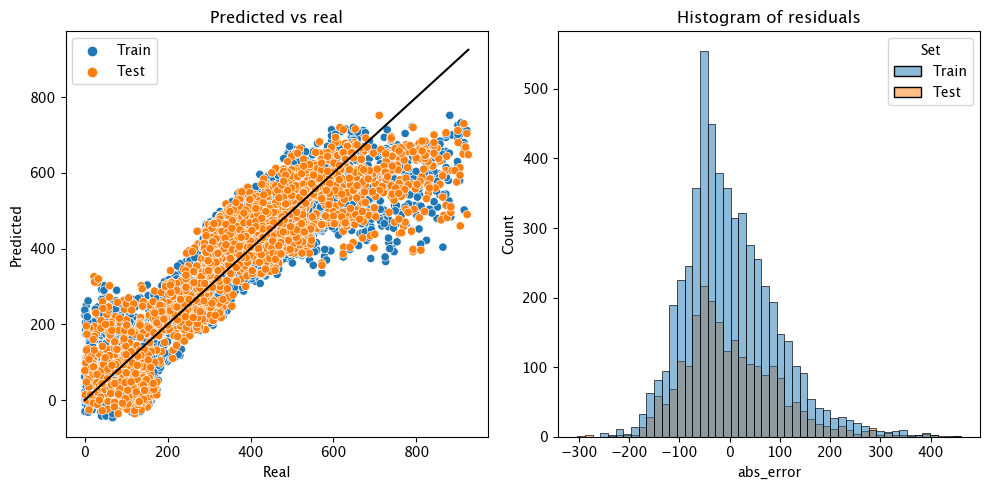

In [325]:
# Plot scatterplot and histogram of errors
plot_real_and_predicted_errors(results_df)

## 11.3 Error Metrics Report

In [326]:
# Create function to generate an error metrics report

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    
    This function calculates the MAE, MSE, RMSE and R2 error metrics 
    and returns a df with the results.
    
    Inputs:
    y_real_train: real y values used as training data
    y_real_test: real y values used as test data
    y_pred_train: predicted y values obtained from training data
    y_pred_test: predicted y values obtained from test data
    
    Outputs:
    DataFrame with the results for each error metric 
    for real and predicted data.
    
    '''
    # Mean absolute error
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared = False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared = False)

    # R2 error
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE','MSE','RMSE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [327]:
# Create error metrics DataFrame
error_metrics_df = error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                                            list(results_df[results_df["Set"]=="Test"]["Real"]),
                                            list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                                            list(results_df[results_df["Set"]=="Test"]["Predicted"]))
# Display error metrics report
display(error_metrics_df)

,Metric,Train,Test
0,MAE,70.64,74.50
1,MSE,8335.11,9263.26
2,RMSE,91.30,96.25
3,R2,0.79,0.77


## 11.4 Conclusions

+ In conclusion, my model seems to be performing reasonably well. The errors on the test set are slightly higher than on the training set, which is to be expected because the model was trained on the training set. The R² values indicate that the model is capturing most of the variation in the data, but there is still room for improvement. We might want to consider adding more features, using a more complex model, or tuning my model's parameters to try to increase the R² and decrease the error metrics.